### Freshman Year (2016) Visualizations

In [38]:
# module imports
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np

In [9]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# load in data
df = pd.read_csv('../data/full_matches.csv')

In [3]:
# filter out all other data
fr = df[df['season'] == 'FR']

#### EDA

In [4]:
fr.head()

,match_key,career_match_index,career_stage,season,season_match_number,date,day_of_week,week_of_season,days_since_last_match,match_no,...,receiving_errors,receiving_per_set,aces,aces_per_set,ace_pct,serve_attempts,serve_errors,serve_pct,points,maxpreps
0,FR_09-01_TA_1,1.0,early,FR,1,2016-09-01,Thursday,1,0,1,...,2.0,4.3,6.0,2.0,40.0,15.0,2.0,86.7,0.0,https://www.maxpreps.com/games/09-01-2016/voll...
1,FR_09-09_RCSA_1,2.0,early,FR,2,2016-09-09,Friday,2,8,1,...,0.0,6.5,2.0,1.0,33.3,6.0,0.0,100.0,0.0,https://www.maxpreps.com/games/09-09-2016/voll...
2,FR_09-09_INTERLACHEN_2,3.0,early,FR,3,2016-09-09,Friday,2,0,2,...,2.0,4.0,4.0,2.0,50.0,8.0,0.0,100.0,0.0,https://www.maxpreps.com/games/09-09-2016/voll...
3,FR_09-09_FSDB_3,4.0,early,FR,4,2016-09-09,Friday,2,0,3,...,2.0,6.0,5.0,2.5,62.5,8.0,0.0,100.0,0.0,https://www.maxpreps.com/games/09-09-2016/voll...
4,FR_09-17_AIDB_1,5.0,early,FR,5,2016-09-17,Saturday,3,8,1,...,0.0,4.0,2.0,0.7,22.2,9.0,1.0,88.9,0.0,https://www.maxpreps.com/games/09-17-2016/voll...


In [14]:
cols = ['day_of_week', 'week_of_season', 'days_since_last_match', 'multi_game_day', 'opponent', 'deaf_school',
        'match_type', 'result', 'set_result', 'location', 'did_play', 'played_all_sets', 'low_error_game']

for col in cols:
    print('value counts:')
    print(fr[col].value_counts())
    print('--------------------')

value counts:
day_of_week
Saturday     10
Friday        9
Thursday      6
Tuesday       6
Wednesday     4
Monday        1
Name: count, dtype: int64
--------------------
value counts:
week_of_season
6     9
4     7
7     4
8     4
2     3
3     2
10    2
11    2
1     1
5     1
9     1
Name: count, dtype: int64
--------------------
value counts:
days_since_last_match
0     12
1     10
3      6
2      4
8      2
7      1
12     1
Name: count, dtype: int64
--------------------
value counts:
multi_game_day
False    21
True     15
Name: count, dtype: int64
--------------------
value counts:
opponent
Sidwell Friends                             2
Woodrow Wilson                              2
California School for the Deaf              2
California School for the Deaf-Riverside    2
Riverdale Baptist                           2
Mississippi School for the Deaf             1
Spencerville Adventist Academy              1
Washington International                    1
Field                         

In [16]:
cols = ['total_matches_that_day', 'total_sets_that_day', 'set_diff', 'total_points_for', 'total_points_against',
        'margin_pct', 'win_streak', 'loss_streak', 'kills', 'assists', 'total_blocks', 'digs', 'receiving', 'aces']

for col in cols:
    print('summary:')
    print(round(fr[col].describe(), 2))
    print('--------------------')

summary:
count    36.00
mean      2.22
std       1.57
min       1.00
25%       1.00
50%       1.00
75%       3.25
max       5.00
Name: total_matches_that_day, dtype: float64
--------------------
summary:
count    36.00
mean      5.31
std       2.75
min       3.00
25%       3.00
50%       3.50
75%       7.50
max      10.00
Name: total_sets_that_day, dtype: float64
--------------------
summary:
count    36.00
mean      0.69
std       2.38
min      -3.00
25%      -2.00
50%       2.00
75%       3.00
max       3.00
Name: set_diff, dtype: float64
--------------------
summary:
count    36.00
mean     59.58
std      21.16
min       0.00
25%      49.50
50%      60.50
75%      75.00
max      97.00
Name: total_points_for, dtype: float64
--------------------
summary:
count     36.00
mean      49.94
std       20.17
min        0.00
25%       37.75
50%       50.00
75%       60.25
max      102.00
Name: total_points_against, dtype: float64
--------------------
summary:
count    35.00
mean      0.09
std

#### Visualizations

In [19]:
fr.columns

Index(['match_key', 'career_match_index', 'career_stage', 'season',
       'season_match_number', 'date', 'day_of_week', 'week_of_season',
       'days_since_last_match', 'match_no', 'total_matches_that_day',
       'total_sets_that_day', 'multi_game_day', 'first_match_of_day',
       'last_match_of_day', 'same_day_opponent_num', 'opponent',
       'opponent_slug', 'season_opponent_num', 'is_repeat_opponent',
       'deaf_school', 'match_type', 'event_name', 'milestone_flag', 'result',
       'set_scores', 'set_count', 'set_result', 'set_diff', 'location',
       'comeback_win', 'total_points_for', 'total_points_against',
       'margin_pct', 'high_margin_win', 'low_margin_loss', 'did_play',
       'played_all_sets', 'stats_available', 'season_highs_flags',
       'career_highs_flags', 'record_breaker_flag', 'deciding_set_win',
       'deciding_set_loss', 'low_error_game', 'win_streak', 'loss_streak',
       'was_set_swept', 'swept_opponent', 'deciding_set_played', 'sets_played',
     

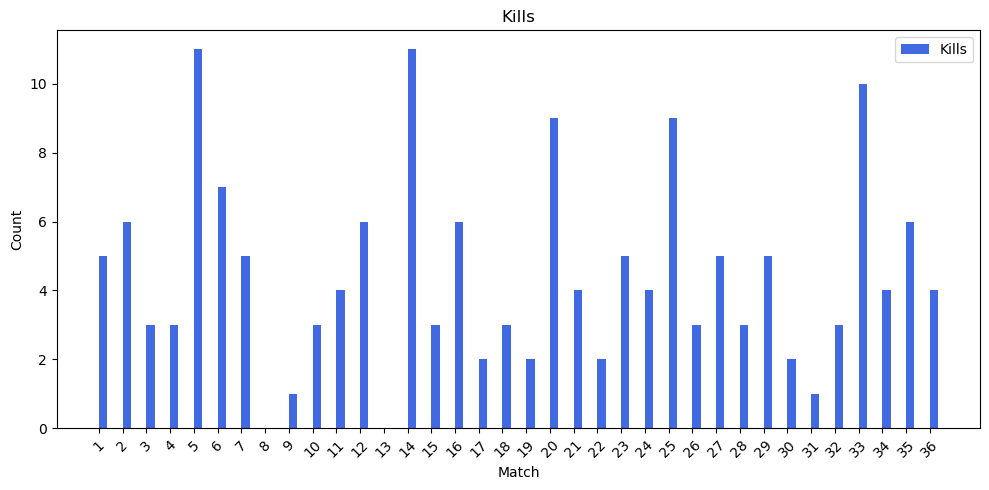

In [48]:
matches = fr['season_match_number']
kills = fr['kills']

x = np.arange(len(matches))  # positions for bars
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x + width/2, kills, width, label='Kills', color='royalblue')

ax.set_xlabel('Match')
ax.set_ylabel('Count')
ax.set_title('Kills')
ax.set_xticks(x)
ax.set_xticklabels(matches, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()
